In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import yfinance as yf

# 데이터 불러오기

In [18]:
# 삼성전자, SK하이닉스 주가 데이터 불러오기
stock_price = yf.download({'005930.KS','000660.KS'}, '2022-01-01', '2022-01-21')

stock_price

[*********************100%***********************]  2 of 2 completed


Adj Close               Close                High            \
           000660.KS 005930.KS 000660.KS 005930.KS 000660.KS 005930.KS   
Date                                                                     
2022-01-04  128500.0   78700.0  128500.0   78700.0  130000.0   79200.0   
2022-01-05  125500.0   77400.0  125500.0   77400.0  129000.0   79000.0   
2022-01-06  125000.0   76900.0  125000.0   76900.0  127000.0   77600.0   
2022-01-07  127000.0   78300.0  127000.0   78300.0  129000.0   78400.0   
2022-01-10  124500.0   78000.0  124500.0   78000.0  127000.0   78100.0   
2022-01-11  128000.0   78900.0  128000.0   78900.0  128500.0   79000.0   
2022-01-12  128500.0   78900.0  128500.0   78900.0  130000.0   79600.0   
2022-01-13  129500.0   77900.0  129500.0   77900.0  130000.0   79300.0   
2022-01-14  128500.0   77300.0  128500.0   77300.0  129000.0   78100.0   
2022-01-17  127000.0   77500.0  127000.0   77500.0  128000.0   77800.0   
2022-01-18  126500.0   77000.0  126500.0   77000.0  127500.0   77800.0   
2022-01-19  127000.0   76300.0  127000.0   76300.0  128500.0   76900.0   
2022-01-20  125000.0   76500.0  125000.0   76500.0  126500.0   76700.0   

                 Low                Open              Volume            
           000660.KS 005930.KS 000660.KS 005930.KS 000660.KS 005930.KS  
Date                                                                    
2022-01-04  127500.0   78300.0  129500.0   78800.0   3622369  12427416  
2022-01-05  121500.0   76400.0  129000.0   78800.0   7414954  25470640  
2022-01-06  123000.0   76600.0  123500.0   76700.0   3725569  12931954  
2022-01-07  126500.0   77400.0  127000.0   78100.0   3270119  15163757  
2022-01-10  123000.0   77100.0  126500.0   78100.0   3449197   9947422  
2022-01-11  124500.0   78000.0  125500.0   78400.0   3958787  13221123  
2022-01-12  126500.0   78600.0  129500.0   79500.0   3552174  11000502  
2022-01-13  128000.0   77900.0  128500.0   79300.0   4155984  13889401  
2022-01-14  126000.0   77100.0  128500.0   77700.0   3769648  10096725  
2022-01-17  124500.0   76900.0  127500.0   77600.0   3730393   8785122  
2022-01-18  125000.0   76600.0  126500.0   77600.0   3607850   9592788  
2022-01-19  123500.0   76100.0  123500.0   76500.0   4094609  10598290  
2022-01-20  123500.0   75900.0  126000.0   76200.0   5441986   9708168

# 1. 모수에 대한 가설 검정

## A. 모평균에 대한 가설검정

In [5]:
# 정규분포 그리는 함수 (week_5 distribution 파일에 포함)
def normal_df(N, sigma, mu):
    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt
    import seaborn as sns

    np.random.seed(0)
    x = sp.stats.norm(mu, sigma).rvs(N)

    # 시각화하는 부분은 주석처리하여 따로 출력하지 않고, 대신 데이터의 형성 후 return 해줌.
    # ax = sns.distplot(x, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x.std(),3)})")
    # plt.legend(bbox_to_anchor=(1.0, .2))
    # plt.show()

    return x

In [6]:
def t_test(x1, x2, sig_level = 0.05):
    from scipy.stats import ttest_ind

    print(f't-test 검정통계치 : {ttest_ind(x1, x2)[0]}')
    print(f't-test p-value : {round(ttest_ind(x1, x2)[1], 3)}')
    
    # t-test로 도출한 p값을 기존에 설정한 유의수준과 비교하여 귀무가설을 기각할 수 있는지 여부를 표시해줌.
    if ttest_ind(x1,x2)[1] < sig_level:
        print(f't-test 결과, {sig_level*100}%의 유의수준으로 두 데이터의 모평균이 같다는 귀무가설을 기각할 수 있습니다.')
    else:
        print(f't-test 결과, {sig_level*100}%의 유의수준으로 두 데이터의 모평균이 같다는 귀무가설을 기각할 수 없습니다.')

/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


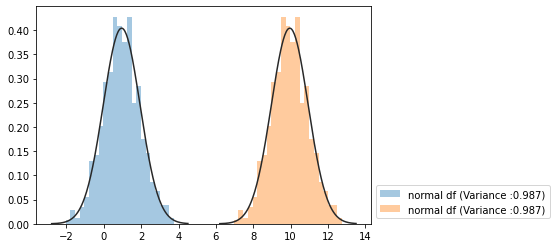

t-test 검정통계치 : -203.78795583613376
t-test p-value : 0.0
t-test 결과, 5.0%의 유의수준으로 두 데이터의 모평균이 같다는 귀무가설을 기각할 수 있습니다.


In [7]:
# 정규분포의 특성을 가지는 임의의 데이터 2개 형성
x1 = normal_df(1000, 1, 1)  # 평균 1, 표준편차 1
x2 = normal_df(1000, 1, 10) # 평균 10, 표준편차 1

# 시각화
sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x1.std(),3)})")
sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x2.std(),3)})")
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

# t-test 진행
t_test(x1, x2, 0.05)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


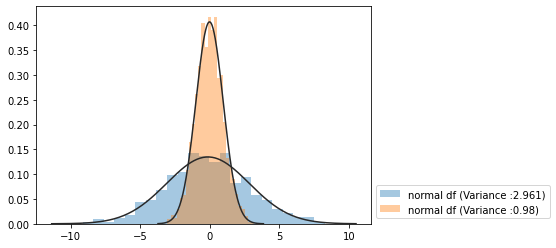

t-test 검정통계치 : -1.3973555186452973
t-test p-value : 0.162
t-test 결과, 5.0%의 유의수준으로 두 데이터의 모평균이 같다는 귀무가설을 기각할 수 없습니다.


In [11]:
# 표준정규분포 형성 (평균이 동일하지만, 표준편차와 데이터 개수가 다른 데이터 형성)
x1 = normal_df(1000, 3, 0) # (평균 = 0, 표준편차 = 3)
x2 = normal_df(1500, 1, 0) # (평균 = 0, 표준편차 = 1)

# 시각화
sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x1.std(),3)})")
sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x2.std(),3)})")
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

t_test(x1, x2, 0.05)

/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


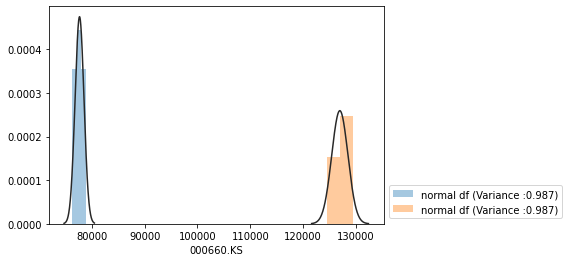

t-test 검정통계치 : -97.47974805093635
t-test p-value : 0.0
t-test 결과, 5.0%의 유의수준으로 두 데이터의 모평균이 같다는 귀무가설을 기각할 수 있습니다.


In [17]:
# 주가 데이터를 이용해보기

# 시각화
sns.distplot(stock_price['Adj Close']['005930.KS'], kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x1.std(),3)})")
sns.distplot(stock_price['Adj Close']['000660.KS'], kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x2.std(),3)})")
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

t_test(stock_price['Adj Close']['005930.KS'], stock_price['Adj Close']['000660.KS'])

## B. 모비율에 대한 가설검정

In [19]:
def chi2(x1, x2, sig_level=0.05):
    from scipy.stats import chi2_contingency

    print(f'카이제곱 검정통계치 : {chi2_contingency([x1, x2])[0]}')
    print(f'카이제곱 P-value : {round(chi2_contingency([x1, x2])[1], 3)}')
    print(f'자유도 : {chi2_contingency([x1, x2])[2]}')
    
    # 귀무가설을 기각할 지 여부를 p 값으로 판단하고 출력해주는 부분
    if chi2_contingency([x1, x2])[1] < sig_level:
        print(f'카이제곱 검정 결과, 두 데이터 집단의 모비율이 같다는 귀무가설을 유의수준 {sig_level * 100}%로 기각할 수 있습니다.')
    else:
        print(f'카이제곱 검정 결과, 두 데이터 집단의 모비율이 같다는 귀무가설을 유의수준 {sig_level * 100}%로 기각할 수 없습니다.')
        
# 삼성, 하이닉스 주가의 모비율에 대한 가설검정
chi2(stock_price['Adj Close']['005930.KS'], stock_price['Adj Close']['000660.KS'], 0.05)

카이제곱 검정통계치 : 82.8556172433191
카이제곱 P-value : 0.0
자유도 : 12
카이제곱 검정 결과, 두 데이터 집단의 모비율이 같다는 귀무가설을 유의수준 5.0%로 기각할 수 있습니다.


## C. 모분산에 대한 가설검정

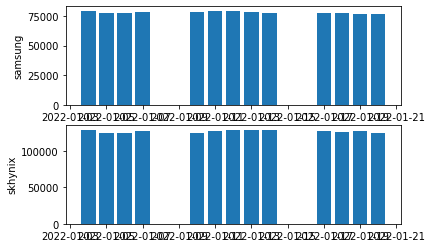

In [20]:
# 강원도 경찰청 5대 범죄 데이터로 진행해봅니다.

# 검거와 발생 데이터를 리스트 형태로 새롭게 지정함.
arrest = stock_price['Adj Close']['005930.KS'].tolist()
occur = stock_price['Adj Close']['000660.KS'].tolist()

# 데이터 보기
plt.subplot(2,1,1)
plt.bar(x = stock_price.index, height = stock_price['Adj Close']['005930.KS'])
plt.ylabel('samsung')
plt.subplot(2,1,2)
plt.bar(x = stock_price.index, height = stock_price['Adj Close']['000660.KS'])
plt.ylabel('skhynix')
plt.show()

In [21]:
def f_test(x1,x2,sig_level=0.05):
    # 라이브러리 호출
    from scipy.stats import f_oneway

    # 검정통계치. p값을 출력하는 부분 (소수점 3째 자리까지)
    print(f'F-test 검정통계치 : {round(f_oneway(x1, x2)[0], 3)}')
    print(f'F-test P-value : {round(f_oneway(x1, x2)[1], 3)}')

    # 귀무가설을 기각할 지 여부를 p 값으로 판단하고 출력해주는 부분    
    if f_oneway(x1, x2)[1] < sig_level:
        print(f'F 검정 결과, 두 데이터 집단의 모분산이 같다는 귀무가설을 유의수준 {sig_level * 100}%로 기각할 수 있습니다.')
    else:
        print(f'F 검정 결과, 두 데이터 집단의 모분산이 같다는 귀무가설을 유의수준 {sig_level * 100}%로 기각할 수 없습니다.')
        
f_test(stock_price['Adj Close']['005930.KS'], stock_price['Adj Close']['000660.KS'], sig_level=0.05)

F-test 검정통계치 : 9502.301
F-test P-value : 0.0
F 검정 결과, 두 데이터 집단의 모분산이 같다는 귀무가설을 유의수준 5.0%로 기각할 수 있습니다.


# 2. 표본에 대한 가설 검정

## A. 단일표본 t 검정 (1-sample T-test)

In [38]:
import numpy as np
from scipy.stats import ttest_1samp

# 정규분포 형성 함수를 이용하여 정규분포 데이터 형성 
x = normal_df(1000, 10, 1)  # 평균 10, 표준편차 1
test = 10
# 1-sample t-test 시행 (평균이 10이 맞는지)
result= ttest_1samp(x,test)

print(f'T 검정 검정통계량 : {result[0] : .4f}')
print(f'T 검정 p-value : {result[1] : .4f}')

if result[1] < 0.05:
    print(f'평균이 {test}이 아니라는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.')
else:
    print(f'평균이 {test}이 아니라는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.')

T 검정 검정통계량 : -30.2692
T 검정 p-value :  0.0000
평균이 10이 아니라는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.


## B. 독립 표본 t 검정 (Unpaired T-test)

### B-1 등분산일 경우 (T-test)

In [23]:
# 위의 모평균 차이 검정에서 진행한 것과 동일하므로 주석처리하였음

# # 정규분포의 특성을 가지는 임의의 데이터 2개 형성
# x1 = normal_df(1000, 1, 1)  # 평균 1, 표준편차 1
# x2 = normal_df(1000, 1, 10) # 평균 10, 표준편차 1

# # 시각화
# sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x1.std(),3)})")
# sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x2.std(),3)})")
# plt.legend(bbox_to_anchor=(1.0, .2))
# plt.show()

# # t-test 진행
# t_test(x1, x2, 0.05)

### B-2 이분산일 경우 (Welch's T-test)

In [22]:
# 위에서 등분산 검정에서 귀무가설 기각으로 이분산이 성립한 2개의 샘플에 대해서 이분산 t-test 진행
f_test(stock_price['Adj Close']['005930.KS'], stock_price['Adj Close']['000660.KS'], sig_level=0.05)

F-test 검정통계치 : 9502.301
F-test P-value : 0.0
F 검정 결과, 두 데이터 집단의 모분산이 같다는 귀무가설을 유의수준 5.0%로 기각할 수 있습니다.


In [24]:
from scipy.stats import ttest_ind

result = ttest_ind(stock_price['Adj Close']['005930.KS'], stock_price['Adj Close']['000660.KS'], equal_var=False)


print(f'T 검정 검정통계량 : {result[0] : .4f}')
print(f'T 검정 p-value : {result[1] : .4f}')

if result[1] < 0.05:
    print(f'평균이 같지않다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.')
else:
    print(f'평균이 같지않다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.')
    
# 물론 실제로도 두 데이터의 평균은 다릅니다.
# print(f'Samsung 주가 평균 : {np.mean(stock_price['Adj Close']['005930.KS'])}')
# print(f'SKhynix 주가 평균 : {np.mean(stock_price['Adj Close']['000660.KS'])}')

T 검정 검정통계량 : -97.4797
T 검정 p-value :  0.0000
평균이 같지않다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.


## C. 대응표본 t 검정 (Paired T-test)

In [20]:
# 대응표본 예시 데이터 (고혈압약을 투약한 경우, 어떤 유의한 변화가 나타나는지 대응표본 검정을 시행한다)

# # csv file
# data = pd.read_csv(path+'대응표본T검정예제.csv')

# # excel file
# data = pd.read_excel(path+'대응표본T검정예제.xlsx')

# git hub
data = pd.read_csv('https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/대응표본T검정예제.csv')

data

,before,after
0,168,104
1,152,145
2,154,135
3,160,116
4,149,112
5,166,112
6,147,140
7,176,114
8,155,145
9,177,133


In [21]:
def two_paired_test(x1, x2, sig_level=0.05):
    # 라이브러리 호출
    from scipy.stats import ttest_rel

    print(f'대응 2표본 검정통계치 : {round(ttest_rel(x1, x2)[0], 3)}')
    print(f'대응 2표본 P-value : {round(ttest_rel(x1, x2)[1], 3)}')
    
    # 귀무가설을 기각할 지 여부를 p 값으로 판단하고 출력해주는 부분    
    if ttest_rel(x1, x2)[1] < sig_level:
        print(f'대응 2표본 검정 결과, "변화가 나타나지 않았다."라는 귀무가설을 유의수준 {sig_level * 100}%로 기각할 수 있습니다.')
    else:
        print(f'대응 2표본 검정 결과, "변화가 나타나지 않았다."라는 귀무가설을 유의수준 {sig_level * 100}%로 기각할 수 없습니다.')
        
two_paired_test(data['before'], data['after'], 0.05)

대응 2표본 검정통계치 : 7.695
대응 2표본 P-value : 0.0
대응 2표본 검정 결과, "변화가 나타나지 않았다."라는 귀무가설을 유의수준 5.0%로 기각할 수 있습니다.
